---
title: "Air Quality Analysis of Thomas Fire"
description: "Visualize the impact of the Thomas Fire on air quality in Santa Barbara County, California"
author:
  name: Haejin Kim
  url: http://khj9759.github.io
  affiliation: MEDS
  affiliation-url: http://ucsb-meds.github.io
date: 2023-12-13
categories: [Geospetial, Data_Science, MEDS] # self-defined categories
citation:
  url: https://khj9759.github.io/posts/2023-12-09-thomas-fire/
image: fire.webp
draft: False # setting this to `true` will prevent your post from appearing on your listing page until you're ready! 
---

# Air Quality Analysis of Thomas Fire

Author: Haejin Kim

Repository: https://github.com/khj9759/air_quality
    
## About
This project aims to generate a comprehensive analysis by creating a false color image that vividly portrays the fire scar resulting from the 2017 Thomas Fire. To achieve this, the project utilizes Air Quality Index (AQI) data sourced from the US Environmental Protection Agency. The primary objective is to visually depict the substantial impact of the Thomas Fire on air quality conditions specifically within Santa Barbara County.

## Highlights 
- Employed Pandas for data manipulation and time-series analysis
- GeoPandas for geospatial tasks including patches and clipping
- Created clear map legends using Matplotlib's mpatches
- Rioxarray for efficient raster data handling

## About the data 

#### 1) Landsat Collection 2 Level-2 Atmospherically Corrected Surface Reflectance Data:
This dataset comprises simplified bands (red, green, blue, near-infrared, and shortwave infrared) derived from the Landsat Collection 2 Level-2 atmospherically corrected surface reflectance data, collected by the Landsat 8 satellite. The data underwent preprocessing in the Microsoft Planetary Computer, involving the removal of non-land data and spatial resolution reduction (Landsat Collection in MPC). It is intended for visualization purposes only.

#### 2) California State Fire Perimeters 2017:
A shapefile detailing fire perimeters in California during 2017. The complete file is accessible via the CA state geoportal.

- fire_name: Name of Fire
- geometry

Data resource: https://gis.data.ca.gov/datasets/CALFIRE-Forestry::california-fire-perimeters-all-1/about

#### 3) Air Quality Data for 2017 and 2018:
This dataset was obtained from the EPA data portal. It contains 10 columns with information about statename, countyname, AQI, Defining Parameter, and Date. For the purpose of this analysis, the following columns will be utilized:

- AQI: Air Quality Index
- Date: time to measure 
- County Name
- Number of Report: Report to Fire 
- Defining Parameter: Method to measure air quality

Data resource: https://www.epa.gov/

## Final Output

This document aims to produce two main outputs:

1) Create a graph of the Daily AQI and 5-Day Average

<img src="image/AQI_SB.png" alt="Example Image" width="400">

2) Mapping the Thomas Fire area in Santa Barbara

<img src="image/Thomas_fire_map.png" alt="Example Image" width="400">




## Import libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # for creating legends

import rioxarray as rioxr
import geopandas as gpd

from rasterio.features import rasterize # for rasterizing polygons

In [2]:
pd.set_option('display.max_columns', None)

# Import Data
Use the pandas function `pd.concat()` as `aqi`

In [3]:
# air quality data from EPA
aqi_17 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip")
aqi_18 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip")

# combine two data in one dataset
aqi = pd.concat([aqi_17, aqi_18], ignore_index=True)
aqi.head(2)

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,21,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,22,Good,PM2.5,01-003-0010,1


In [4]:
# open landsat perimeters in california
landsat = rioxr.open_rasterio('data/landsat8-2018-01-26-sb-simplified.nc')
landsat

<xarray.Dataset>
Dimensions:      (band: 1, x: 870, y: 731)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 0
Data variables:
    red          (band, y, x) float64 ...
    green        (band, y, x) float64 ...
    blue         (band, y, x) float64 ...
    nir08        (band, y, x) float64 ...
    swir22       (band, y, x) float64 ...

In [5]:
# open fire perimeters in california
ca_fire = gpd.read_file(os.path.join(os.getcwd(), 'data','California_Fire_Perimeters_2017','California_Fire_Perimeters_2017.shp'))
ca_fire.head(2)

,index,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,C_METHOD,OBJECTIVE,GIS_ACRES,COMMENTS,COMPLEX_NA,COMPLEX_IN,IRWINID,FIRE_NUM,DECADES,SHAPE_Leng,SHAPE_Area,geometry
0,19836,41429,2017,CA,CCO,VNC,BROOK,00042450,2017-05-23,2017-05-24,14.0,1.0,1.0,10.043819,per walked track,None,None,None,None,2010,1246.055781,59473.666651,"POLYGON ((-13229812.974 4046876.486, -13229786..."
1,19837,41430,2017,CA,CCO,VNC,PACIFIC,00075307,2017-09-09,2017-09-09,14.0,1.0,1.0,1.190109,Final Walked track. Small spot to the north east,None,None,None,None,2010,561.418202,7081.369481,"POLYGON ((-13286872.985 4074523.355, -13286895..."


In [6]:
# make column names small caps
ca_fire.columns = ca_fire.columns.str.lower()
print('column name of ca_fire: ',ca_fire.columns, "\n")

# re-assign the column names - .str.lower() makes them lower case
#  re-assign the column names again - .str.replace(' ','_') replaces the space for _
aqi.columns = aqi.columns.str.lower()
aqi.columns = aqi.columns.str.replace(' ','_')
print('column name of aqi: ',aqi.columns, '\n')

column name of ca_fire:  Index(['index', 'objectid', 'year_', 'state', 'agency', 'unit_id', 'fire_name',
       'inc_num', 'alarm_date', 'cont_date', 'cause', 'c_method', 'objective',
       'gis_acres', 'comments', 'complex_na', 'complex_in', 'irwinid',
       'fire_num', 'decades', 'shape_leng', 'shape_area', 'geometry'],
      dtype='object') 

column name of aqi:  Index(['state_name', 'county_name', 'state_code', 'county_code', 'date', 'aqi',
       'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting'],
      dtype='object') 



## Data Cleaning
Convert the column names to lowercase and replace ' ' with '_' for both `ca_fire` and `aqi`.

In [7]:
# make column names small caps
ca_fire.columns = ca_fire.columns.str.lower()
print('column name of ca_fire: ',ca_fire.columns, "\n")

# re-assign the column names - .str.lower() makes them lower case
#  re-assign the column names again - .str.replace(' ','_') replaces the space for _
aqi.columns = aqi.columns.str.lower()
aqi.columns = aqi.columns.str.replace(' ','_')
print('column name of aqi: ',aqi.columns, '\n')

column name of ca_fire:  Index(['index', 'objectid', 'year_', 'state', 'agency', 'unit_id', 'fire_name',
       'inc_num', 'alarm_date', 'cont_date', 'cause', 'c_method', 'objective',
       'gis_acres', 'comments', 'complex_na', 'complex_in', 'irwinid',
       'fire_num', 'decades', 'shape_leng', 'shape_area', 'geometry'],
      dtype='object') 

column name of aqi:  Index(['state_name', 'county_name', 'state_code', 'county_code', 'date', 'aqi',
       'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting'],
      dtype='object') 



For the AQI data, narrow down the scope to focus on California and Santa Barbara. Remove unnecessary columns such as state_name, county_name, state_code, and county_code.

In [8]:
# new data frame 'aqi_sb' select only data California and Santa Barbara. 
aqi_sb = aqi[(aqi.state_name == 'California') & (aqi.county_name == 'Santa Barbara')].copy()

# remove `state_name`, `county_name`, `state_code` and `county_code` columns
aqi_sb = aqi_sb.drop(columns = ['state_name','county_name','state_code','county_code'])

aqi_sb.dtypes

date                         object
aqi                           int64
category                     object
defining_parameter           object
defining_site                object
number_of_sites_reporting     int64
dtype: object

As observed, the 'aqi_sb' column appears to contain objects. To convert these objects into datetime values, you can utilize the 'precip.DATE' column and then apply the 'set_index' function.

In [9]:
# covert precip.DATE column to timedate objects
aqi_sb.date = pd.to_datetime(aqi_sb.date)
aqi_sb = aqi_sb.set_index('date')

Indexing the DataFrame with a DateTime index.

In [10]:
# Check the updated index of aqi_sb and its data type
index_dtype = aqi_sb.index
print(index_dtype)

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='date', length=730, freq=None)


## Rolling Window Calculations
Utilize the `rolling()` method available for `pandas.Series` to perform rolling window calculations. Setting the parameter to '5D' specifies a window of 5 days, while the aggregator function `mean()` computes the mean over each window.

In [11]:
# we get a pd.Series as ouput
aqi_sb.aqi.rolling('5D').mean()

# Calculate the 5-day rolling mean of AQI and add it as a new column
aqi_sb['five_day_average']=aqi_sb.aqi.rolling('5D').mean()

# Display the DataFrame with the new 'five_day_average' column
print(aqi_sb)

            aqi  category defining_parameter defining_site  \
date                                                         
2017-01-01   39      Good              Ozone   06-083-4003   
2017-01-02   36      Good              Ozone   06-083-4003   
2017-01-03   71  Moderate               PM10   06-083-4003   
2017-01-04   34      Good              Ozone   06-083-4003   
2017-01-05   37      Good              Ozone   06-083-4003   
...         ...       ...                ...           ...   
2018-12-27   37      Good              Ozone   06-083-1025   
2018-12-28   39      Good              Ozone   06-083-1021   
2018-12-29   39      Good              Ozone   06-083-1021   
2018-12-30   39      Good              Ozone   06-083-1021   
2018-12-31   38      Good              Ozone   06-083-1021   

            number_of_sites_reporting  five_day_average  
date                                                     
2017-01-01                         12         39.000000  
2017-01-02         

## Update 
Utilize the `squeeze()` function followed by `drop()` to remove the specified band.

In [12]:
# original dimensions and coordinates
print(landsat.dims, landsat.coords,'\n')

# remove length 1 dimension (band)
landsat = landsat.squeeze()
print(landsat.dims, landsat.coords,'\n')

# remove coordinates associated to band
landsat = landsat.drop('band')
print(landsat.dims, landsat.coords)

Frozen({'band': 1, 'x': 870, 'y': 731}) Coordinates:
  * band         (band) int64 1
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 0 

Frozen({'x': 870, 'y': 731}) Coordinates:
    band         int64 1
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 0 

Frozen({'x': 870, 'y': 731}) Coordinates:
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 0


## Matching Coordinate Reference Systems (CRS)
In order to generate the map, compare the CRS (Coordinate Reference Systems) of ca_fire and landsat, and ensure they have the same CRS by matching them.

In [13]:
# check CRS
print(f"california_fire: {ca_fire.crs} \nland sat: {landsat.rio.crs}\n")

# transform fishing_areas CRS to epsg:32611
ca_fire = ca_fire.to_crs(landsat.rio.crs)

print('match crs landsat and ca_fire?:', landsat.rio.crs == ca_fire.crs)

california_fire: EPSG:3857 
land sat: EPSG:32611



match crs landsat and ca_fire?: True


## Dissolve and Clipping
Aggregate the geometries based on the values of a column such as geometry and `fire_name`, assigning the resulting structure the name `fire_districts`.

Clip the landsat data to include only the areas within the boundaries of the `fire_districts`.

In [14]:
# dissolve by district
fire_districts = ca_fire[['geometry','fire_name']].dissolve(by='fire_name', as_index=False)
fire_districts

# clipping the ca perimeter only fire 
fire_districts_clip = landsat.rio.clip_box(*fire_districts.total_bounds)

## Clipping to the Area of Thomas Fire Exclusively
Clip the dataset to encompass solely the geographical extent affected by the Thomas Fire.

In [15]:
# Registered areas:
# print(ca_fire.fire_name.unique())

# Filter the 'fire_districts' dataset to obtain the area specifically related to the Thomas Fire
fire_thomas = fire_districts[fire_districts.fire_name == 'THOMAS']

## Plotting Daily AQI and 5-Day Average
Generate a line plot illustrating both the daily Air Quality Index (AQI) and the 5-day average. Overlay the 5-day average on the daily AQI data. Notably, December 2017 recorded substantially high AQI levels in Santa Barbara, CA. This observed surge in AQI is directly linked to the impact of the Thomas fire.

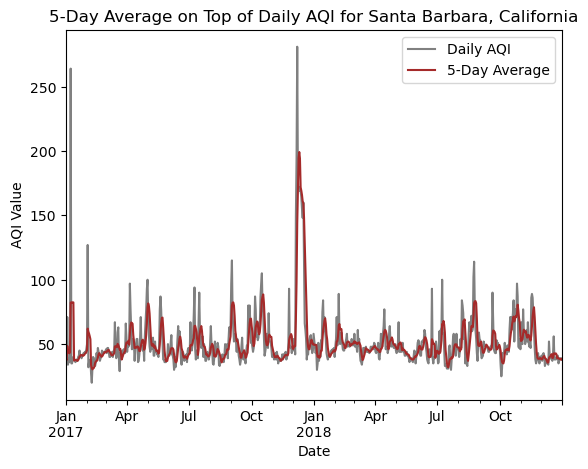

In [16]:
# initialize empty figure
fig, ax = plt.subplots()

# ---------------------------
# Create a line plot for daily AQI on the existing ax
aqi_sb.plot(y='aqi', ax=ax, label='Daily AQI', color='grey')

# Create a line plot for the 5-day average on the same ax
aqi_sb.plot(y='five_day_average', ax=ax, label='5-Day Average', color='brown')


# ----------------------------
# Set plot title and labels
ax.set_title('5-Day Average on Top of Daily AQI for Santa Barbara, California')
ax.set_xlabel('Date')
ax.set_ylabel('AQI Value')

# display figure
plt.show()
#plt.savefig('image/AQI_SB.png', bbox_inches='tight',  dpi=100)

## Map
Displays the false color image composed of shortwave infrared (SWIR), near-infrared (NIR), and red bands. Additionally, overlay the perimeter of the Thomas fire on this map.

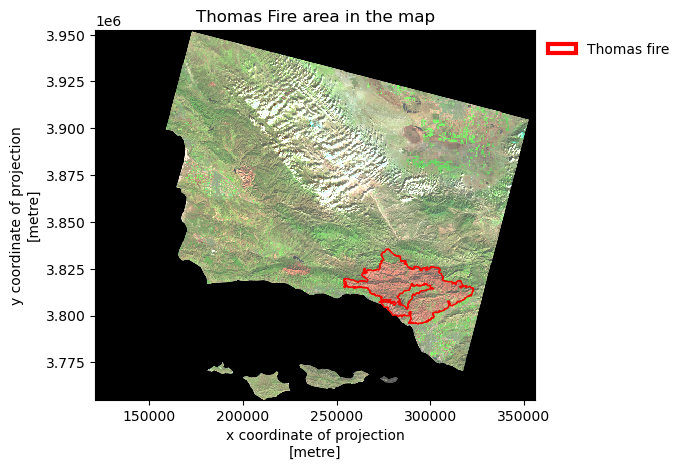

In [17]:

fig, ax = plt.subplots()

# ---------------------------------
# bring the clipping map
fire_districts_clip[['swir22','nir08','red']].to_array().plot.imshow(robust = True)


# bring the fire thomas map
fire_thomas.plot(ax=ax, edgecolor='red', color='none')

# ---------------------------------
# create the patch
fire_thomas_patch = mpatches.Patch(edgecolor='red', facecolor='none', linewidth=3,
                              label='Thomas fire')
 
# ---------------------------------
# Adding legend with custom label colors and settings
legend = ax.legend(handles=[fire_thomas_patch], frameon=False,loc='upper left', bbox_to_anchor= (1, 1))
ax.set_title('Thomas Fire area in the map')

plt.show()  
#plt.savefig('image/Thomas_fire_map.png', bbox_inches='tight',  dpi=100) 